<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Siamese_Neural_Networks_for_One_shot_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Siamese Neural Networks for One-shot Image Recognition**

논문 링크: https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

machine learning은 매우 다양한 분야에서 좋은 성능을 보이고 있다. 하지만, 좋은 성능을 보여주는 supervised learning의 경우 feature를 학습하기 위해선 그만큼 많은 data가 필요하기 때문에 많은 data를 확보하지 못하게 되면 모델의 구조가 아무리 좋아도 제대로 된 성능을 발휘하기 힘들다.

따라서, 본 논문에서는 data가 부족한 상황에서 추가적인 학습(retraining)없이 새로운 class에 대해서도 좋은 성능을 낼 수 있는 **one-shot learning**을 사용하는 **샴 네트워크(Siamese Neural Networks)**을 연구하였다.

## **One-shot Learning**

One-shot leaning은 n-way k-shot에서 k=1인 few shot learning이다.

이게 과연 무엇인지 예시를 들어보겠다.

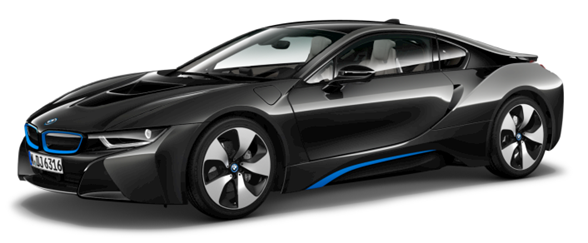

예를 들어 위와 같은 자동차의 이미지들을 가져와 "car"로 라벨링하여 model을 학습시켰다고 가정해보겠다.

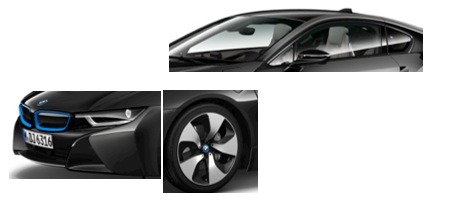

그러면 모델은 위와 같이 자동차의 전면, 바퀴, 유리 등 여러 특징을 찾아내 다양한 자동차를 높은 확률로 잘 분류해낸다.

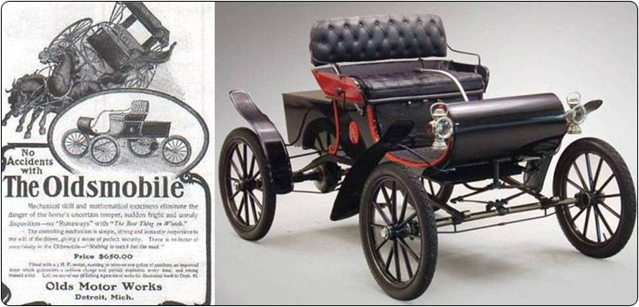

하지만 위와 같은 자동차의 경우는 어떻게 될까?

사람의 경우는 얼추 몇 장의 사진만 보고도 'car'라고 인식을 할 수 있다. 하지만 model의 경우 'car'라고 인식하기 힘들다.

이처럼 인간과 같이 소량의 데이터만으로도 학습을 할 수 있게 하는 것을 **Few-shot learning**이라고 하며, 그 중 **One-shot learning**은 한 장의 데이터만으로 학습을 할 수 있게 만드는 것이다.

## **Siamese Neural Networks 구조**

샴 네트워크 구조 자체는 2005년에 Yann LeCun 교수님께서 참여를 하신 논문인 **learning a similarity metric discriminatively with application to face verification**에 나왔다.

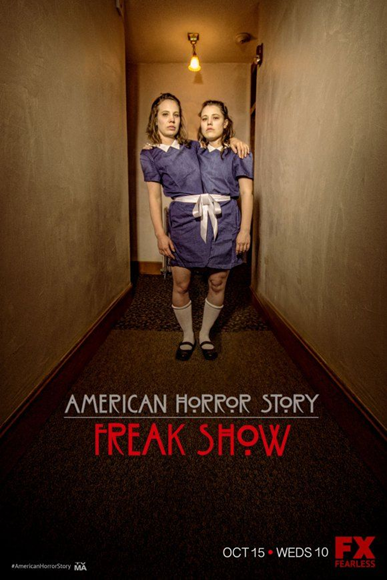

흔하게 볼 수 있는건 아니지만 쌍둥이(twins)는 거의 동일한 생김새를 지녔다. 하지만 **샴 쌍둥이**(siamese twins)의 경우는 더욱 특별하다. 위의 그림과 같이 그들은 신체의 일부를 공유한다.

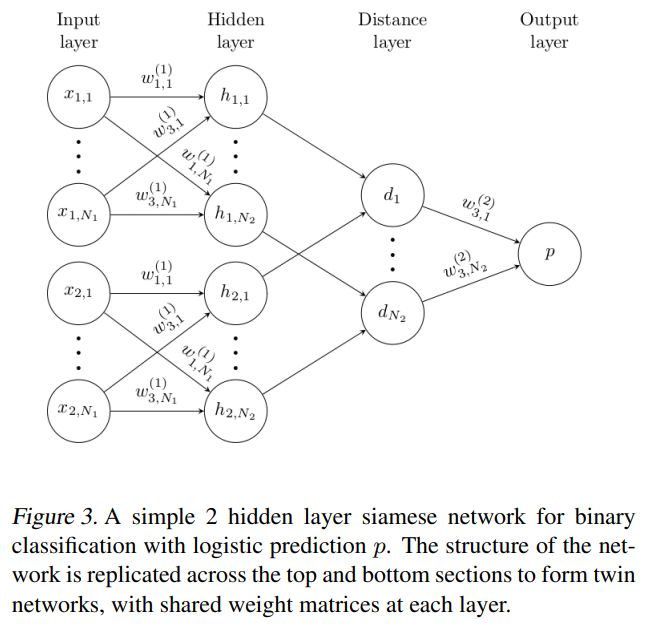

위의 그림 Figure 3과 같이 샴 네트워크(Siamese Neural Network)는 샴 쌍둥이에서 척안된 구조이다. Siamese Nerual Network는 내부에 두 개의 sub network가 존재한다. input image가 pair로 존재하기 때문에 각각의 이미지를 sub netwokr에 넣어 output 두개를 만들고 두 ouput을 통해 distance를 산출한다. 또한, **두 네트워크는 서로 닮았을 뿐만아니라 weight를 공유한다.**

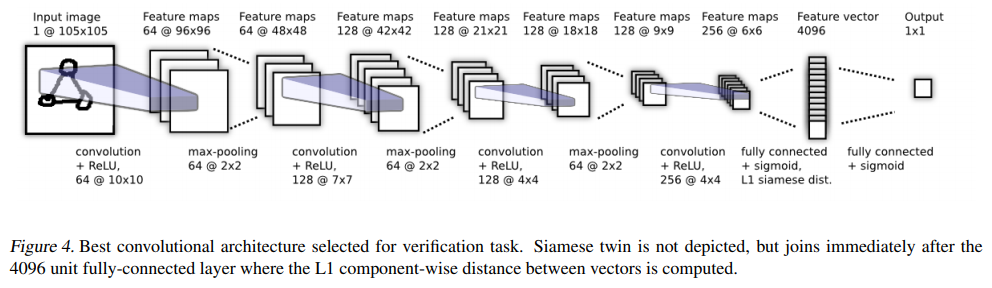

위의 그림 Figure 4를 보면 연구에서 사용한 모델의 구조를 자세히 알 수 있다.

샴 네트워크(Siamese networks)는 symmetric 하기 때문에 (A, B)의 산출 값과 (B, A)의 산출 값이 같아야 한다. 따라서 논문에서는 feature vector h1, h2 사이에 L1 distance를 계산하고 activation function으로 sigmoid를 사용하여 0과 1사이로 output을 낸다. (0: different, 1: same) 따라서 이때 loss function은 binary cross-entropy를 사용한다. 따라서 activation function의 경우 binary cross-entropy를 사용하기 위해 마지막 layer에 sigmoid를 사용하는 것을 제외하고는 ReLU를 사용한다.

## **Experiments**

구체적인 training 방법은
1. 두 개의 입력 데이터를 준비한다.
2. 각 입력에 대한 embedding 값을 얻는다.
3. 두 embedding 사이의 거리를 계산한다. (L1 norm, L2 norm)
4. 두 입력이 같은 클래스에 속한다면 거리를 가깝게, 다른 클래스에 속한다면 거리를 멀게하여 학습한다.

의 순서로 진행이 된다.

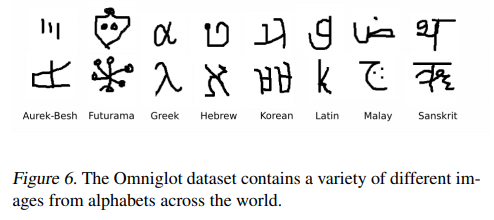

위의 그림 Figure 6 본 논문에서는 사용한 **20-way 1-shot learning**을 진행하기 위한 Omniglot dataset이다. 이 dataset의 특징은 50개 언어의 alphabet 데이터이며 각 언어당 15~50개의 alphabet characters을 가지고 있다. 또한 alphabet characters 당 20개의 data가 존재한다.

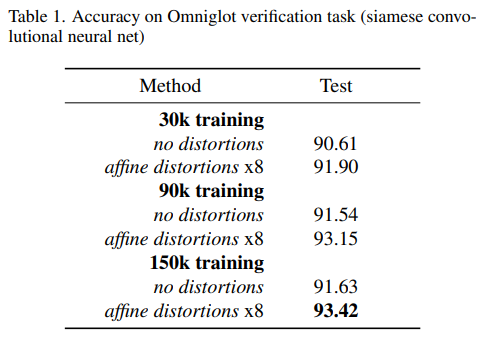

먼저, 위의 표 Table 1과 같은 학습을 하기 위해 총 30k, 90k, 150k 쌍의 데이터를 만들었다. 이 쌍은 same image pair와 different image pair의 비율이 1:1이다. 그리고 데이터를 만드는 방법은

1. 40개의 backgroud set에서 train data과 validation data을 3:1 비율로 나눈다.
2. 30개의 train set에서 20명의 사람이 쓴 이미지 중 12명의 이미지만 고른다.
3. 즉, 30개의 alphabet에서 12명의 사람이 쓴 이미지만 추려와서 30k, 90k, 150k만큼의 이미지 쌍을 만든다.
4. 여기서 8개의 transform을 이용하여 augmentation을 통해 이미지 데이터를 증폭한다. 총 270k, 810k, 1350k 개의 이미지 쌍이 생성된다.

위와 같다.

One-shot learning에서는 evaluation 방법이 기존 머신러닝과 다르게 한번에 20개의 class에 대해 판단할 수 있어야한다.

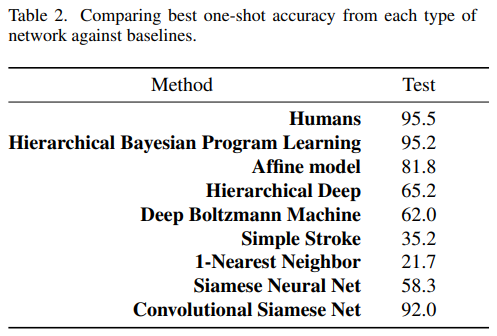

위의 표 Table 2를 보면 HBPL이 휼륭한 성능을 보이고 있으나 HBPL의 경우는 획 순서, 방향 등과 같은 추가적인 정보를 가지고 있지만 Convolutional Siamse Net은 extra 정보 없이 92%의 성능을 달성했다.

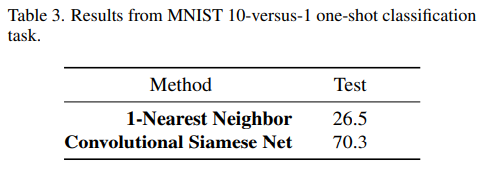

마지막으로 위의 Table 3은 Omniglot dataset에 pretrained된 모델로 MNIST datset에 10-way 1-shot classification을 진행했는데, 1-Nearest Neightbor보다 훨씬 좋은 성능을 보여주는 것을 알 수 있다. 여기서 알 수 있는 점은 **추가적인 학습 없이 Omniglot dataset으로만 훈련한 모델이 MNIST dataset에서도 어느 정도 훌륭한 성능**을 보이고 있다는 것이다. 이는 즉, 모델을 학습할 때 feature가 generalization을 만족스럽게 했다고 평가할 수 있다.